# Consigna: Práctica 3 Ejercicio 6

### Clasificación de Estilos de Cerveza

Agregue más estilos de cerveza:  
- **IPA** (amarga pero no tan oscura)  
- **Scottish** (ligeramente oscura pero no tan amarga)

#### a)
Genere un **dataset sintético** con valores acordes para estos nuevos estilos.

#### b)
Utilice la biblioteca **Scikit-Learn** para generar **clasificadores** para cada uno de ellos. Luego, realice la **clasificación** correspondiente a cada estilo.

#### c)
Implemente las técnicas **OVR (One-Vs-Rest)** y **OVO (One-Vs-One)** para la **clasificación multiclase**.

#### d)
Utilice la técnica **softmax** con el parámetro `multi_class='multinomial'` para entrenar el modelo multiclase.

#### e)
Evalúe los **modelos aprendidos** y **reentrene** con diferentes **hiperparámetros**. En todos los casos, **grafique la matriz de confusión** para interpretar gráficamente los resultados.


# Resolución

En este ejercicio implementamos modelos de clasificación multiclase para predecir el estilo de cerveza a partir de sus características, específicamente el color (SRM) y el nivel de amargor (IBU). El objetivo es identificar qué tipo de cerveza corresponde a una combinación determinada de valores, utilizando diferentes estrategias de clasificación.

Se entrenaron tres enfoques con la biblioteca Scikit-learn:
1. One-vs-Rest (OVR): donde cada clase se compara contra todas las demás.
2. One-vs-One (OVO): donde se entrena un clasificador para cada par de clases.
3. Softmax (multinomial): para manejar multiples clases se entrena un solo clasificador, en donde cada clase tiene una cierta probabilidad.

Se analizaron las matrices de confusión y métricas de precisión para cada modelo, con el fin de evaluar su rendimiento y capacidad de generalización sobre los diferentes estilos de cerveza.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Cargar dataset
df = pd.read_csv("./Datasets/dataset_cerveza.csv")

# Debido a que el dataset encontrado tiene como features SRM, IBU y ABV, para el ejercicio solo necesitamos SRM y IBU
X = df[["SRM", "IBU"]].values    # caracteristicas
y = df["CLASE"].values           # etiquetas numericas

mapa_clases = {
    1: "Blanca",
    2: "Lager",
    3: "Pilsner",
    4: "IPA",
    5: "Fuerte",
    6: "Vino de cebada",
    7: "Portero",
    8: "Cerveza fuerte belga"
}

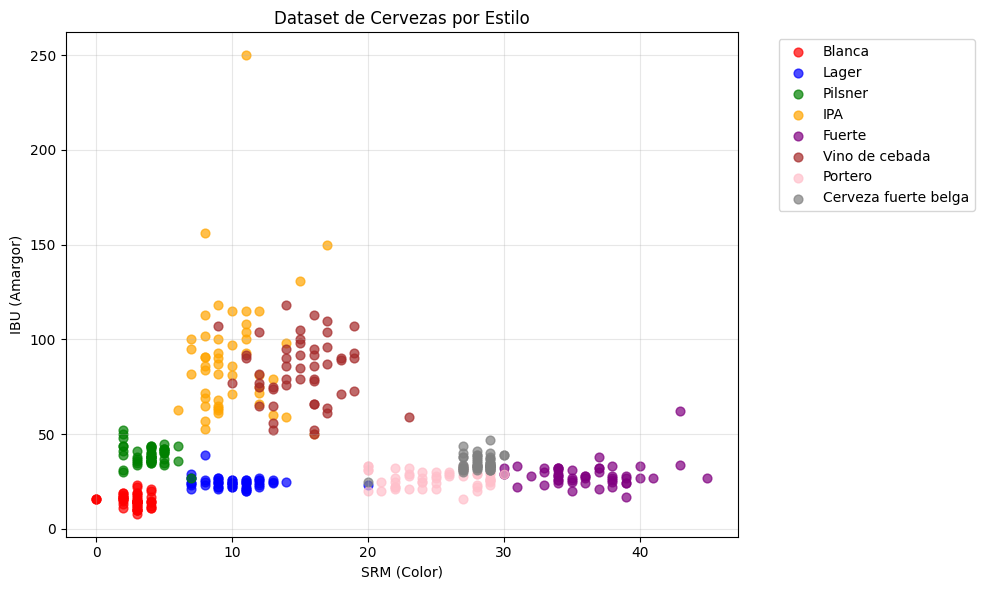

In [3]:
# Visualizacion del dataset
plt.figure(figsize=(10, 6))
colores = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']
nombres_clases = [mapa_clases[i] for i in sorted(mapa_clases.keys())]

for i, (nombre, color) in enumerate(zip(nombres_clases, colores), start=1):
    mask = y == i
    plt.scatter(X[mask, 0], X[mask, 1], c=color, label=nombre, alpha=0.7, s=40)

plt.xlabel('SRM (Color)')
plt.ylabel('IBU (Amargor)')
plt.title('Dataset de Cervezas por Estilo')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [4]:
# Separamos 70% para entrenar y 30% para validacion
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [5]:
# Modelo base: Logistic Regression
base_model = LogisticRegression()

Resultados OVR (One-vs-Rest)
                      precision    recall  f1-score   support

              Blanca       1.00      1.00      1.00        15
               Lager       1.00      1.00      1.00        15
             Pilsner       1.00      1.00      1.00        15
                 IPA       0.92      0.73      0.81        15
              Fuerte       1.00      0.93      0.97        15
      Vino de cebada       0.78      0.93      0.85        15
             Portero       0.94      1.00      0.97        15
Cerveza fuerte belga       0.93      0.93      0.93        15

            accuracy                           0.94       120
           macro avg       0.95      0.94      0.94       120
        weighted avg       0.95      0.94      0.94       120

Resultados OVR (One-vs-Rest) train
                      precision    recall  f1-score   support

              Blanca       1.00      1.00      1.00        35
               Lager       0.97      0.97      0.97        35
  

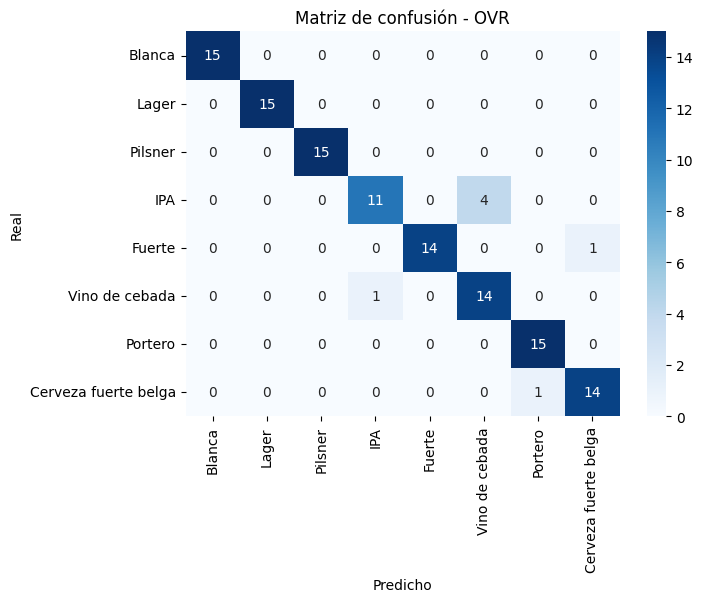

In [6]:
# One-vs-Rest (OVR)
ovr_clf = OneVsRestClassifier(base_model)
ovr_clf.fit(X_train, y_train)

y_pred_ovr = ovr_clf.predict(X_test)
y_pred_ovr_train = ovr_clf.predict(X_train)

print("Resultados OVR (One-vs-Rest)")
print(classification_report(y_test, y_pred_ovr, target_names=[mapa_clases[c] for c in sorted(mapa_clases.keys())]))

print("Resultados OVR (One-vs-Rest) train")
print(classification_report(y_train, y_pred_ovr_train, target_names=[mapa_clases[c] for c in sorted(mapa_clases.keys())]))

cm_ovr = confusion_matrix(y_test, y_pred_ovr)
plt.figure(figsize=(7,5))
sns.heatmap(cm_ovr, annot=True, fmt="d", cmap="Blues",
            xticklabels=[mapa_clases[c] for c in sorted(mapa_clases.keys())],
            yticklabels=[mapa_clases[c] for c in sorted(mapa_clases.keys())])
plt.title("Matriz de confusión - OVR")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

Resultados OVO (One-vs-One)
                      precision    recall  f1-score   support

              Blanca       1.00      1.00      1.00        15
               Lager       1.00      1.00      1.00        15
             Pilsner       1.00      1.00      1.00        15
                 IPA       0.85      0.73      0.79        15
              Fuerte       1.00      0.80      0.89        15
      Vino de cebada       0.76      0.87      0.81        15
             Portero       0.88      1.00      0.94        15
Cerveza fuerte belga       0.81      0.87      0.84        15

            accuracy                           0.91       120
           macro avg       0.91      0.91      0.91       120
        weighted avg       0.91      0.91      0.91       120


Resultados OVO (One-vs-One) train
                      precision    recall  f1-score   support

              Blanca       1.00      1.00      1.00        35
               Lager       0.97      0.97      0.97        35
   

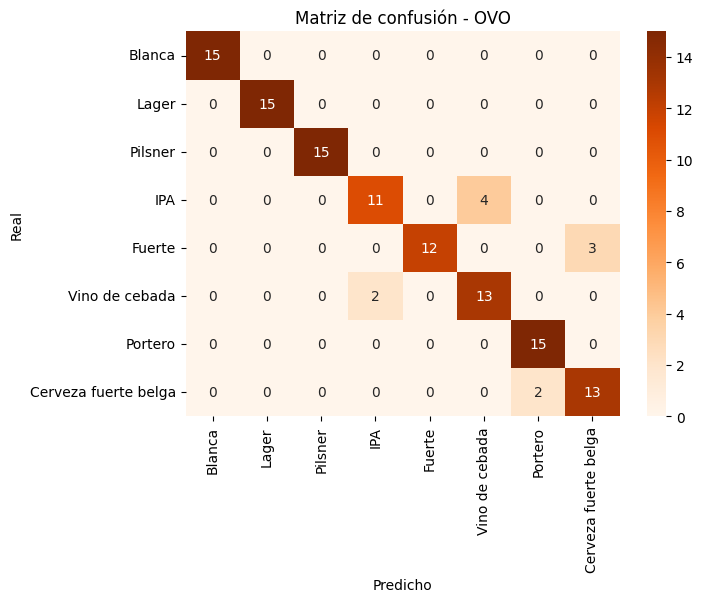

In [7]:
# One-vs-One (OVO)
ovo_clf = OneVsOneClassifier(base_model)
ovo_clf.fit(X_train, y_train)

y_pred_ovo = ovo_clf.predict(X_test)
y_pred_ovo_train = ovo_clf.predict(X_train)

print("Resultados OVO (One-vs-One)")
print(classification_report(y_test, y_pred_ovo, target_names=[mapa_clases[c] for c in sorted(mapa_clases.keys())]))

print("\nResultados OVO (One-vs-One) train")
print(classification_report(y_train, y_pred_ovo_train, target_names=[mapa_clases[c] for c in sorted(mapa_clases.keys())]))

cm_ovo = confusion_matrix(y_test, y_pred_ovo)
plt.figure(figsize=(7,5))
sns.heatmap(cm_ovo, annot=True, fmt="d", cmap="Oranges",
            xticklabels=[mapa_clases[c] for c in sorted(mapa_clases.keys())],
            yticklabels=[mapa_clases[c] for c in sorted(mapa_clases.keys())])
plt.title("Matriz de confusión - OVO")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

Resultados Softmax (multinomial)
                      precision    recall  f1-score   support

              Blanca       1.00      1.00      1.00        15
               Lager       1.00      1.00      1.00        15
             Pilsner       0.94      1.00      0.97        15
                 IPA       0.83      0.67      0.74        15
              Fuerte       1.00      0.87      0.93        15
      Vino de cebada       0.76      0.87      0.81        15
             Portero       0.94      1.00      0.97        15
Cerveza fuerte belga       0.88      0.93      0.90        15

            accuracy                           0.92       120
           macro avg       0.92      0.92      0.92       120
        weighted avg       0.92      0.92      0.92       120


Resultados Softmax (multinomial) train
                      precision    recall  f1-score   support

              Blanca       1.00      1.00      1.00        35
               Lager       0.97      0.94      0.96    

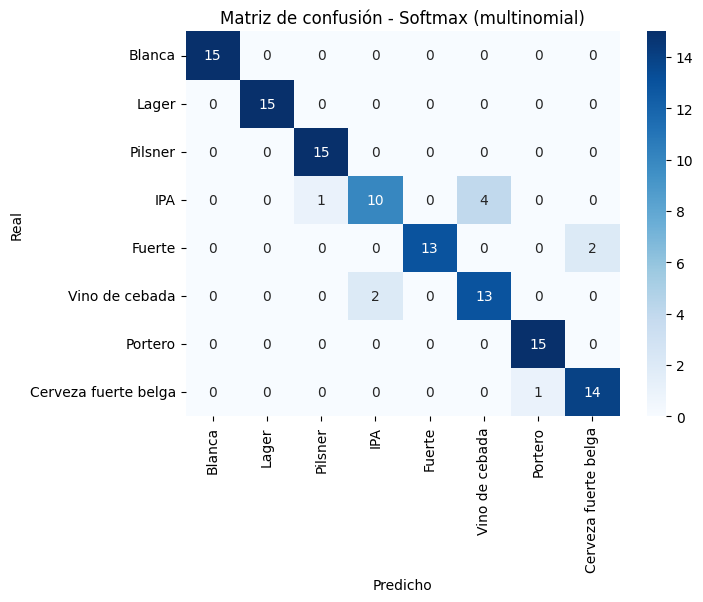

In [8]:
# Softmax

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo con softmax
clf = LogisticRegression(solver="lbfgs", max_iter=2000)
clf.fit(X_train_scaled, y_train)

# Predicciones para test y train usando datos escalados
y_pred = clf.predict(X_test_scaled)
y_pred_train = clf.predict(X_train_scaled)

# Reporte de metricas para test
print("Resultados Softmax (multinomial)")
print(classification_report(y_test, y_pred, target_names=mapa_clases.values()))

# Reporte de metricas para train
print("\nResultados Softmax (multinomial) train")
print(classification_report(y_train, y_pred_train, target_names=mapa_clases.values()))

# Matriz de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=mapa_clases.values(), 
            yticklabels=mapa_clases.values())
plt.title("Matriz de confusión - Softmax (multinomial)")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

# Conclusión

Los resultados obtenidos muestran que los tres enfoques de clasificación lograron un desempeño alto, con precisiones cercanas al 90–94% tanto en entrenamiento como en prueba.
En particular:

- El método One-vs-Rest presentó una precisión del 94%.
- El enfoque One-vs-One obtuvo un rendimiento similar de 91%.
- El modelo Softmax multinomial alcanzó una precisión del 92%.

Las matrices de confusión evidenciaron una correcta separación entre estilos con características bien diferenciadas (por ejemplo, IPA o Lager), y algunas confusiones en estilos con valores similares de SRM e IBU.

El mejor desempeño del modelo OvR puede explicarse porque, en este conjunto de datos, cada clase (tipo de cerveza) posee rasgos distintivos frente al resto lo cual facilita la tarea de distinguir una clase contra todas las demás. En contraste, los modelos Softmax y OvO, al intentar separar todas las clases de manera conjunta o por pares, pueden verse más afectados por las similitudes entre estilos con fronteras difusas.